## KPMG virtual Internship 

### Old Customers Data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show

In [2]:
files = pd.ExcelFile(r"C:\Users\kamakshi\Desktop\KPMG_VI_New_raw_data_update.xlsx")

#### It is the combined dataset which I have already combined with the help of Excel.

In [3]:
ts =files.parse("Transactions")
ts.shape

(20000, 34)

#### In this combined dataset, I have made some extra columns such as Profit, Recency,RFM value and Customer Title to understand the dataset and to find output.


In [4]:
ts.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'recency', 'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'Age category',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'comparison date',
       'Customer Title', 'RFM value'],
      dtype='object')

In [5]:
df=ts.drop(['comparison date'],axis=1)

In [6]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,recency,online_order,order_status,brand,product_line,product_class,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Customer Title,RFM value
0,253,2,3123,2017-12-30,0,0.0,Approved,Giant Bicycles,Road,low,...,N,No,20,6915 Nobel Crossing,2195,NSW,Australia,6,Recent Customer,411
1,411,62,3355,2017-12-30,0,0.0,Approved,Solex,Standard,medium,...,N,No,3,45 Talisman Pass,4102,QLD,Australia,4,Becoming Loyal,422
2,497,62,1854,2017-12-30,0,1.0,Approved,Solex,Standard,high,...,N,Yes,17,48023 International Way,3630,VIC,Australia,1,Recent Customer,412
3,606,70,2878,2017-12-30,0,0.0,Approved,Trek Bicycles,Standard,high,...,N,Yes,9,12574 Truax Alley,2316,NSW,Australia,6,Recent Customer,411
4,748,80,2865,2017-12-30,0,1.0,Approved,Trek Bicycles,Standard,medium,...,N,No,3,6804 Red Cloud Parkway,2099,NSW,Australia,9,Very Loyal,434


In [33]:
#temp = pd.merge(ca,cd,how='outer',on='customer_id')

In [7]:
#df=pd.merge(ts2,temp,how='outer',on='customer_id')
#df.shape

In [8]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'recency', 'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'Age category',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Customer Title',
       'RFM value'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  int64         
 1   product_id                           20000 non-null  int64         
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   recency                              20000 non-null  int64         
 5   online_order                         19640 non-null  float64       
 6   order_status                         20000 non-null  object        
 7   brand                                19803 non-null  object        
 8   product_line                         19803 non-null  object        
 9   product_class                        19803 non-null  object        
 10  product_si

#### These are the Missing values with percentage

In [12]:
dt = pd.DataFrame(list(zip(df.columns,df.isna().sum()/20510*100, df.isna().sum())))
dt

,0,1,2
0,transaction_id,0.000000,0
1,product_id,0.000000,0
2,customer_id,0.000000,0
3,transaction_date,0.000000,0
4,recency,0.000000,0
5,online_order,1.755241,360
6,order_status,0.000000,0
7,brand,0.960507,197
8,product_line,0.960507,197
9,product_class,0.960507,197


## Data Pre-processing

### Data understanding with Visualization

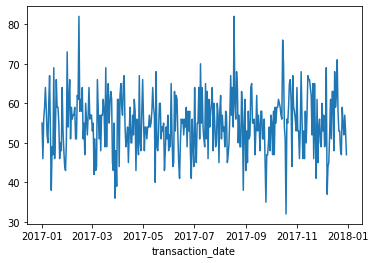

In [10]:
rs = df.groupby('transaction_date').transaction_id.count()
#rs.index, rs.values
sns.lineplot(x = rs.index, y = rs.values)

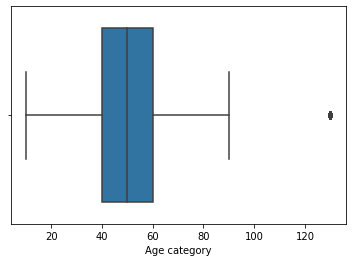

In [11]:
sns.boxplot(df['Age category'])

In [15]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'recency', 'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'Age category',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Customer Title',
       'RFM value'],
      dtype='object')

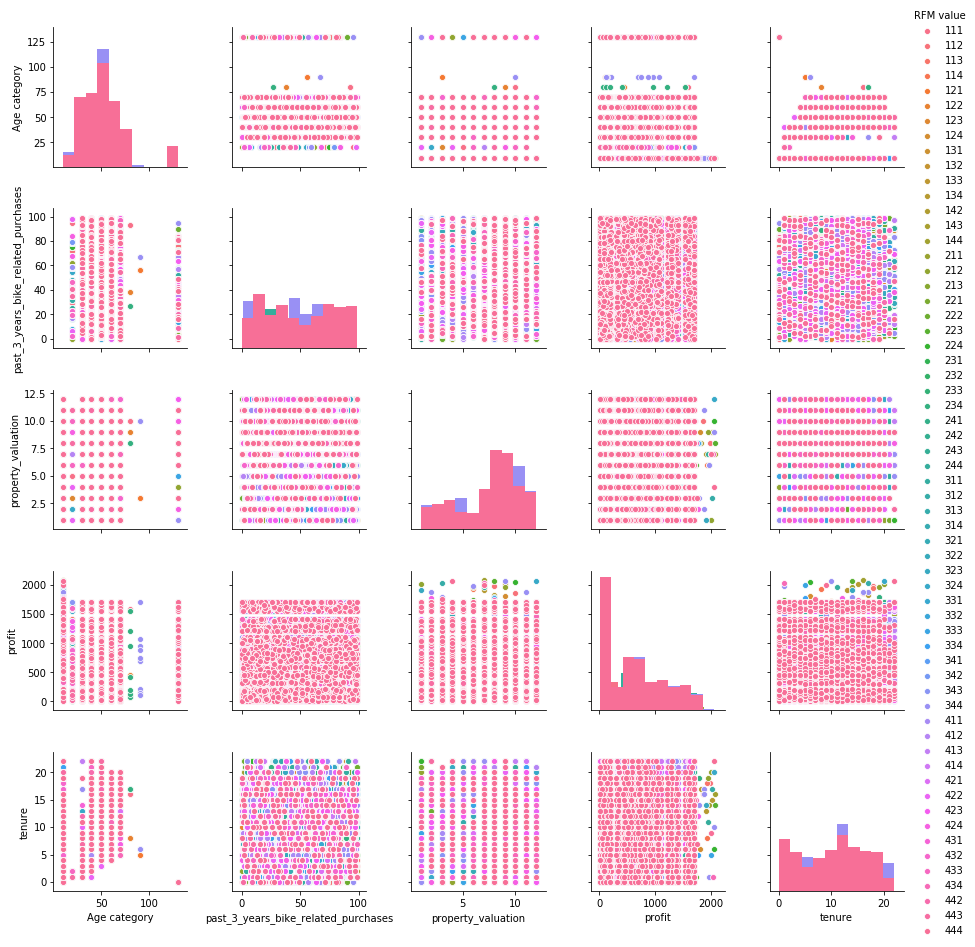

In [17]:
cont_col= ['Age category','past_3_years_bike_related_purchases','property_valuation','RFM value','profit','tenure']
sns.pairplot(df[cont_col],  diag_kind = "hist" , hue = 'RFM value' )
plt.show()

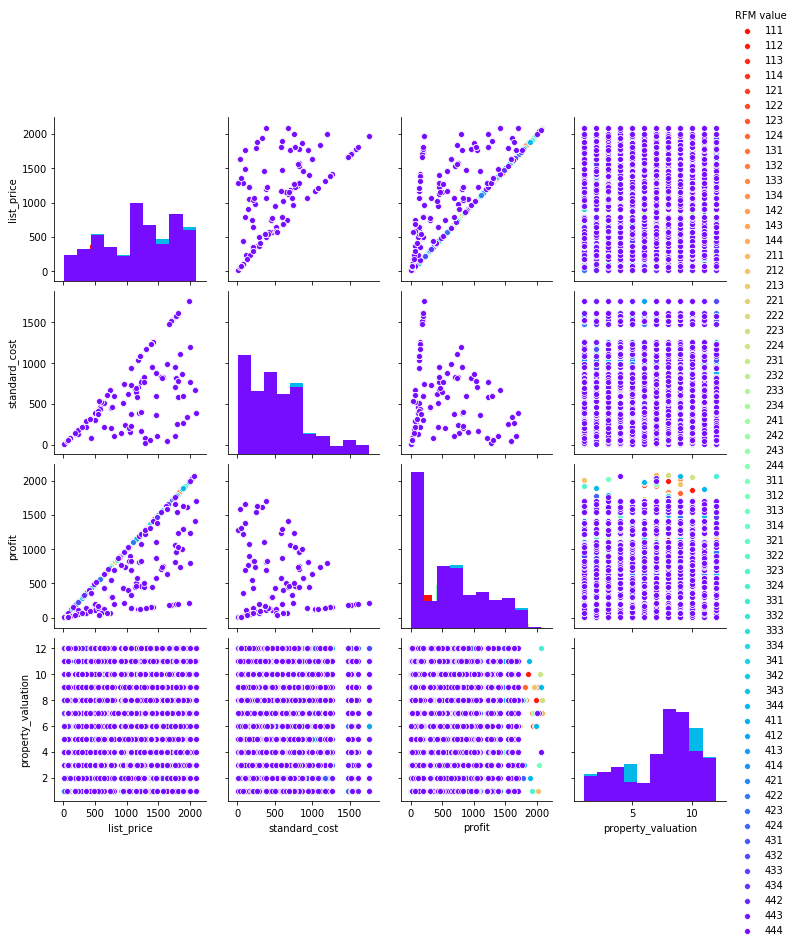

In [19]:
col=['RFM value','list_price', 'standard_cost','profit','property_valuation']
sns.pairplot(df[col],diag_kind='hist',hue='RFM value', palette='rainbow_r')

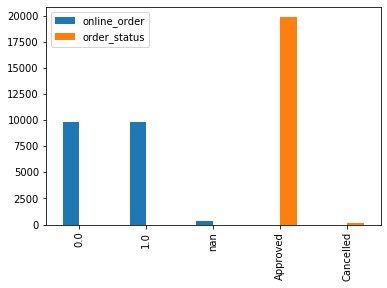

In [23]:
df[['online_order','order_status']].apply(lambda x: x.value_counts(dropna=0)).plot(kind='bar')

In [18]:
pd.melt(df.loc[:,['list_price','standard_cost']])

,variable,value
0,list_price,590.26
1,list_price,478.16
2,list_price,1024.66
3,list_price,495.72
4,list_price,1469.44
...,...,...
39995,standard_cost,215.14
39996,standard_cost,215.14
39997,standard_cost,211.37
39998,standard_cost,521.94


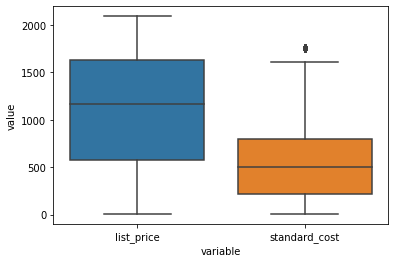

In [19]:
sns.boxplot(x ='variable', y = 'value', data =pd.melt(df.loc[:,['list_price','standard_cost']]))

In [24]:
df.product_first_sold_date[0]

datetime.datetime(2010, 11, 5, 0, 0)

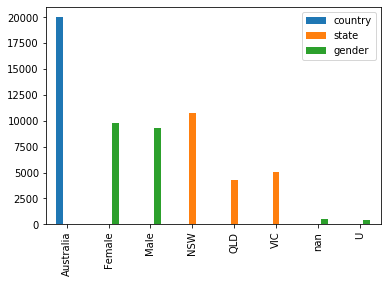

In [28]:
df[['country','state','gender']].apply(lambda x: x.value_counts(dropna=0)).plot(kind='bar')

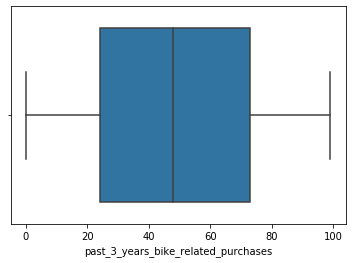

In [21]:
sns.boxplot(df.past_3_years_bike_related_purchases)

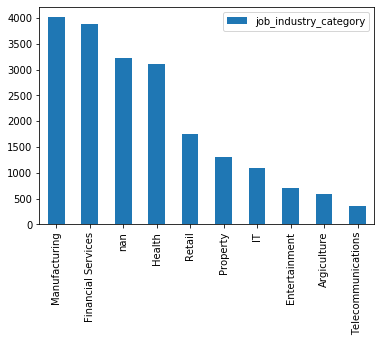

In [31]:
df[['job_industry_category']].apply(lambda x: x.value_counts(dropna=0)).plot(kind='bar')

In [8]:
df[['job_industry_category']].apply(lambda x: x.value_counts(dropna=0))

,job_industry_category
Manufacturing,4014
Financial Services,3886
NaN,3232
Health,3099
Retail,1758
Property,1297
IT,1084
Entertainment,698
Argiculture,578
Telecommunications,354


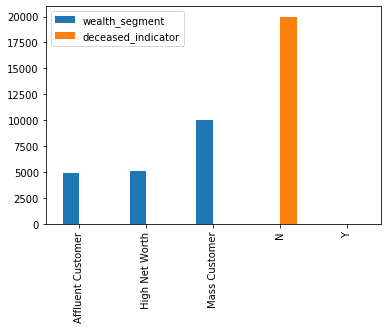

In [32]:
df[['wealth_segment','deceased_indicator']].apply(lambda x: x.value_counts(dropna=0)).plot(kind='bar')

In [24]:
print(df.wealth_segment.value_counts(dropna=0),df.deceased_indicator.value_counts(dropna=0))

Mass Customer        10051
High Net Worth        5088
Affluent Customer     4861
Name: wealth_segment, dtype: int64 N    19992
Y        8
Name: deceased_indicator, dtype: int64


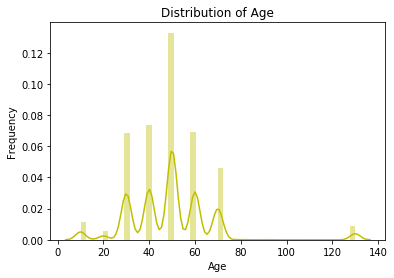

In [33]:
sns.distplot(df['Age category'].dropna(),color='y')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

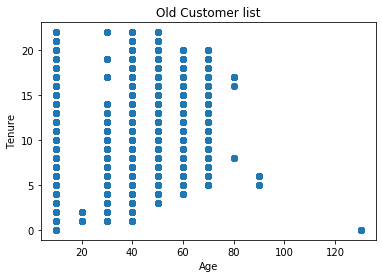

In [34]:
plt.scatter(df['Age category'],df['tenure'])
plt.title("Old Customer list")
plt.xlabel("Age")
plt.ylabel('Tenure')
plt.show()

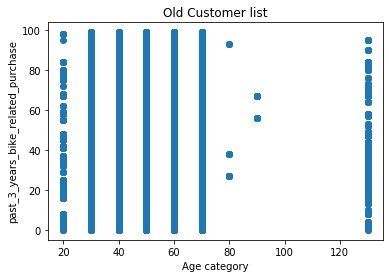

In [35]:
plt.scatter(df['Age category'],df['past_3_years_bike_related_purchases'])
plt.title("Old Customer list")
plt.ylabel("past_3_years_bike_related_purchase")
plt.xlabel('Age category')
plt.show()

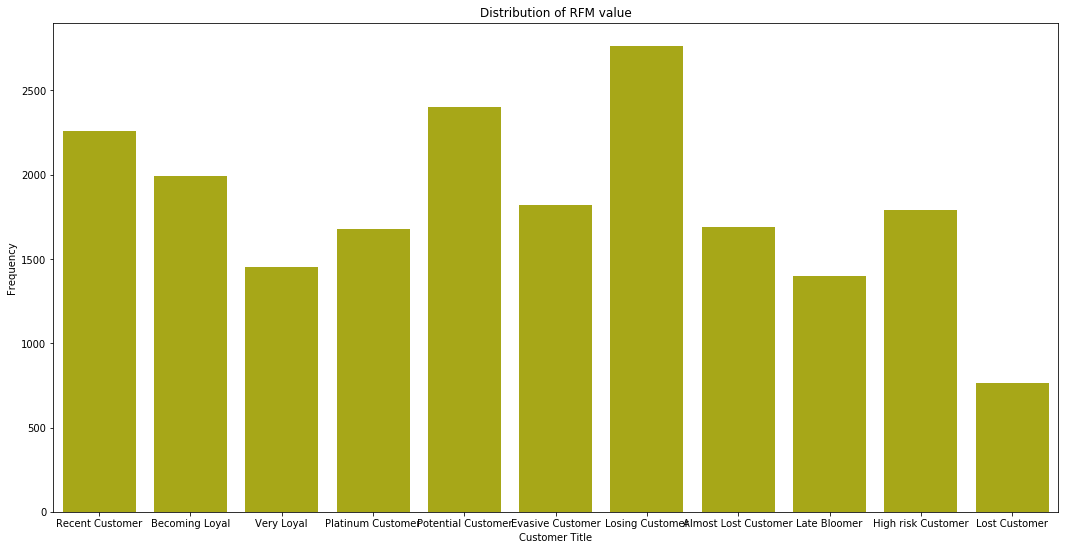

In [46]:
f,ax=plt.subplots(figsize=(18,9))
sns.countplot(df['Customer Title'].dropna(),color='y')
plt.title("Distribution of RFM value")
plt.xlabel("Customer Title")
plt.ylabel("Frequency")
plt.show()

In [53]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'recency', 'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'Age category',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Customer Title',
       'RFM value'],
      dtype='object')

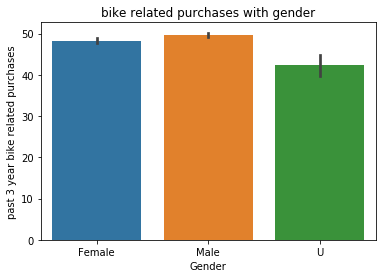

In [57]:
sns.barplot(x=df.gender,y=df.past_3_years_bike_related_purchases)
plt.title("bike related purchases with gender")
plt.xlabel("Gender")
plt.ylabel("past 3 year bike related purchases")
plt.show()

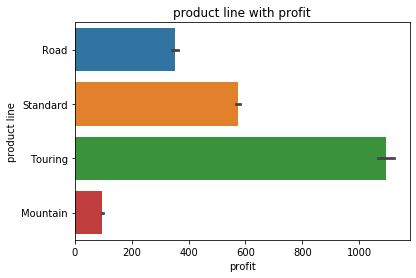

In [65]:
sns.barplot(x=df.profit,y=df.product_line)
plt.title("product line with profit")
plt.xlabel("profit")
plt.ylabel("product line")
plt.show()

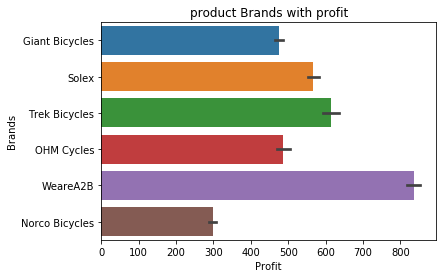

In [67]:
sns.barplot(x=df.profit,y=df.brand)
plt.title("product Brands with profit")
plt.xlabel("Profit")
plt.ylabel("Brands")
plt.show()

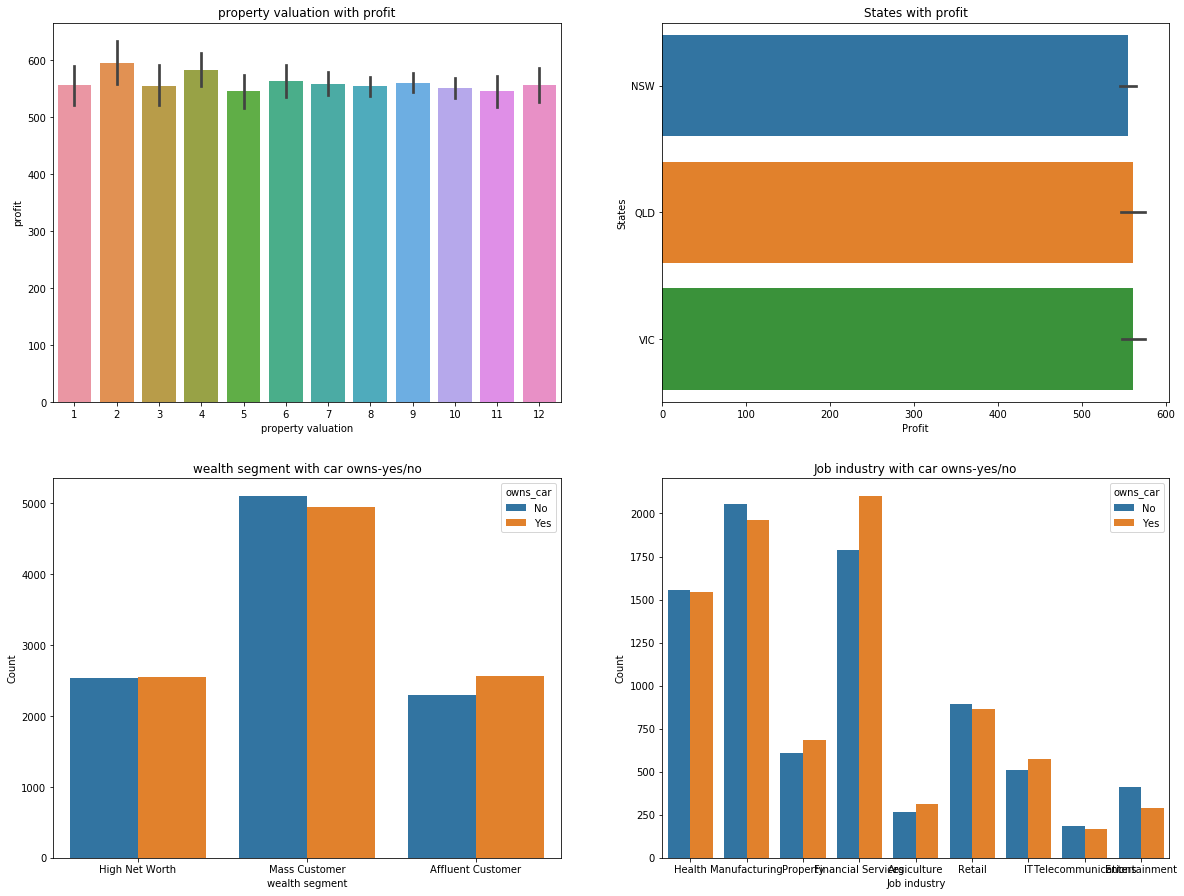

In [82]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(20,4))
plt.subplot(2,2,1)
sns.barplot(x='property_valuation',y='profit',data=df)
plt.title("property valuation with profit")
plt.xlabel("property valuation")
plt.ylabel("profit")
plt.subplot(2,2,2)
sns.barplot(x='profit',y='state',data=df)
plt.title("States with profit")
plt.xlabel("Profit")
plt.ylabel("States")
plt.subplot(2,2,3)
sns.countplot(x='wealth_segment',hue='owns_car',data=df)
plt.title("wealth segment with car owns-yes/no")
plt.xlabel("wealth segment")
plt.ylabel("Count")
plt.subplot(2,2,4)
sns.countplot(x='job_industry_category',hue='owns_car',data=df)
plt.title("Job industry with car owns-yes/no")
plt.xlabel("Job industry")
plt.ylabel("Count")
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

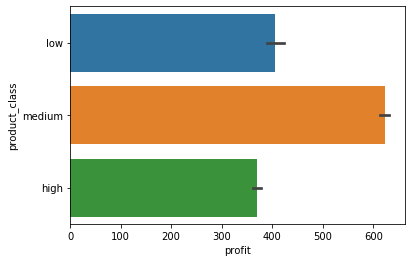

In [69]:
sns.barplot(x='profit',y='product_class',data=df)

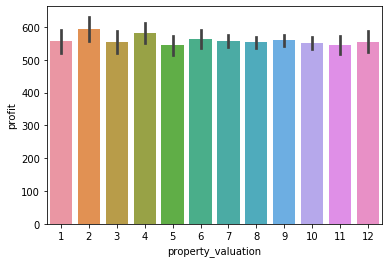

In [71]:
sns.barplot(x='property_valuation',y='profit',data=df)

In [25]:
df.owns_car.value_counts(dropna= 0)

Yes    10063
No      9937
Name: owns_car, dtype: int64

In [9]:
#revenue=df[['transaction_id','customer_id','list_price']].groupby('customer_id').list_price.sum()
#quantity = df[['transaction_id','customer_id','list_price']].groupby('customer_id').transaction_id.count()

In [11]:
data = df.drop(['transaction_id','product_id','list_price','standard_cost','transaction_date'], axis =1)

In [11]:
data.columns

Index(['customer_id', 'recency', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'Age category',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Customer Title',
       'RFM value'],
      dtype='object')

In [31]:
data.drop_duplicates(inplace = True)

In [12]:
#data = pd.merge(data,revenue, how = 'left', on = 'customer_id')
#data = pd.merge(temp,quantity, how = 'left', on = 'customer_id')

In [13]:
#data=data.rename(columns ={'list_price':'revenue'})

In [38]:
# drop unnecessary varibale

In [12]:
#feature selection
data=data.drop(['address','country','DOB','job_title','online_order','order_status','brand',
            'product_class','product_size','product_line','product_first_sold_date','Age','profit','postcode'],axis=1)

In [13]:
data.head()

,customer_id,recency,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Customer Title,RFM value
0,3123,0,Female,71.0,50.0,Health,High Net Worth,N,No,20,NSW,6,Recent Customer,411
1,3355,0,Female,50.0,40.0,Manufacturing,Mass Customer,N,No,3,QLD,4,Becoming Loyal,422
2,1854,0,Female,11.0,50.0,NaN,High Net Worth,N,Yes,17,VIC,1,Recent Customer,412
3,2878,0,Male,73.0,40.0,Property,Mass Customer,N,Yes,9,NSW,6,Recent Customer,411
4,2865,0,Female,11.0,30.0,Manufacturing,High Net Worth,N,No,3,NSW,9,Very Loyal,434


In [14]:
data=data.drop(['recency'],axis=1)
data.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Customer Title,RFM value
0,3123,Female,71.0,50.0,Health,High Net Worth,N,No,20,NSW,6,Recent Customer,411
1,3355,Female,50.0,40.0,Manufacturing,Mass Customer,N,No,3,QLD,4,Becoming Loyal,422
2,1854,Female,11.0,50.0,NaN,High Net Worth,N,Yes,17,VIC,1,Recent Customer,412
3,2878,Male,73.0,40.0,Property,Mass Customer,N,Yes,9,NSW,6,Recent Customer,411
4,2865,Female,11.0,30.0,Manufacturing,High Net Worth,N,No,3,NSW,9,Very Loyal,434


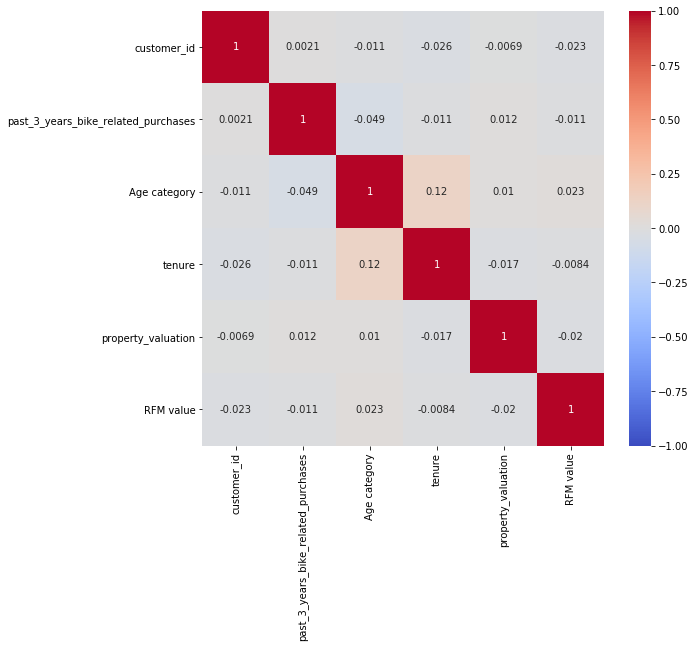

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),vmin=-1,cmap='coolwarm',annot=True);

In [15]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'recency', 'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'Age category',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Customer Title',
       'RFM value'],
      dtype='object')

In [51]:
#data.drop_duplicates(inplace = True)

In [15]:
dt = pd.DataFrame(list(zip(data.columns,data.isna().sum()/20510*100, data.isna().sum())))
dt

,0,1,2
0,customer_id,0.000000,0
1,gender,2.705997,555
2,past_3_years_bike_related_purchases,2.705997,555
3,Age category,0.039005,8
4,job_industry_category,15.758167,3232
5,wealth_segment,0.000000,0
6,deceased_indicator,0.000000,0
7,owns_car,0.000000,0
8,tenure,0.000000,0
9,state,0.000000,0


In [16]:
data.dropna(subset=['gender','past_3_years_bike_related_purchases','Age category'],axis=0,inplace=True)

In [17]:
dt = pd.DataFrame(list(zip(data.columns,data.isna().sum()/20510*100, data.isna().sum())))
dt

,0,1,2
0,customer_id,0.000000,0
1,gender,0.000000,0
2,past_3_years_bike_related_purchases,0.000000,0
3,Age category,0.000000,0
4,job_industry_category,15.299854,3138
5,wealth_segment,0.000000,0
6,deceased_indicator,0.000000,0
7,owns_car,0.000000,0
8,tenure,0.000000,0
9,state,0.000000,0


In [18]:
#imputing value
data.job_industry_category.fillna('unknown',inplace= True)


In [19]:
dt = pd.DataFrame(list(zip(data.columns,data.isna().sum()/20510*100, data.isna().sum())))
dt

,0,1,2
0,customer_id,0.0,0
1,gender,0.0,0
2,past_3_years_bike_related_purchases,0.0,0
3,Age category,0.0,0
4,job_industry_category,0.0,0
5,wealth_segment,0.0,0
6,deceased_indicator,0.0,0
7,owns_car,0.0,0
8,tenure,0.0,0
9,state,0.0,0


In [21]:
data.to_excel(r'C:\Users\kamakshi\Desktop\New folder\Old Customer.xlsx',index=False)

In [22]:
data.shape

(19437, 13)

In [23]:
data.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Customer Title,RFM value
0,3123,Female,71.0,50.0,Health,High Net Worth,N,No,20,NSW,6,Recent Customer,411
1,3355,Female,50.0,40.0,Manufacturing,Mass Customer,N,No,3,QLD,4,Becoming Loyal,422
2,1854,Female,11.0,50.0,unknown,High Net Worth,N,Yes,17,VIC,1,Recent Customer,412
3,2878,Male,73.0,40.0,Property,Mass Customer,N,Yes,9,NSW,6,Recent Customer,411
4,2865,Female,11.0,30.0,Manufacturing,High Net Worth,N,No,3,NSW,9,Very Loyal,434


#### Creating Dummy variables 

In [24]:
mapping = {"N":0,"Y":1,"No":0,"Yes":1}
map2 = {'Mass Customer':0, 'Affluent Customer':1, 'High Net Worth':2}
data.deceased_indicator=data.deceased_indicator.map(mapping)
data.owns_car=data.owns_car.map(mapping)
data.wealth_segment= data.wealth_segment.map(map2)

In [25]:
print(set(data.job_industry_category),set(data.wealth_segment))

{'Telecommunications', 'Health', 'Entertainment', 'Manufacturing', 'Argiculture', 'Retail', 'IT', 'Financial Services', 'Property', 'unknown'} {0, 1, 2}


In [26]:
from sklearn import preprocessing
l1 = preprocessing.LabelEncoder()

In [27]:

data.gender=l1.fit_transform(data.gender)

In [28]:
data.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Customer Title,RFM value
0,3123,0,71.0,50.0,Health,2,0,0,20,NSW,6,Recent Customer,411
1,3355,0,50.0,40.0,Manufacturing,0,0,0,3,QLD,4,Becoming Loyal,422
2,1854,0,11.0,50.0,unknown,2,0,1,17,VIC,1,Recent Customer,412
3,2878,1,73.0,40.0,Property,0,0,1,9,NSW,6,Recent Customer,411
4,2865,0,11.0,30.0,Manufacturing,2,0,0,3,NSW,9,Very Loyal,434


In [157]:
data[['gender']].apply(lambda x: x.value_counts())

,gender
0,8643
1,8364


In [160]:
data.head()

,customer_id,recency,product_line,profit,RFM value,state,property_valuation,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,3123,0.0,1,64.93,411.0,0,6.0,0,71.0,50.0,3,2,0,0,20.0
1,3123,268.0,1,450.77,411.0,0,6.0,0,71.0,50.0,3,2,0,0,20.0
2,3123,326.0,2,641.64,411.0,0,6.0,0,71.0,50.0,3,2,0,0,20.0
3,3123,354.0,2,91.15,411.0,0,6.0,0,71.0,50.0,3,2,0,0,20.0
4,3355,0.0,2,179.44,422.0,1,4.0,0,50.0,40.0,5,0,0,0,3.0


In [30]:
#categorical data
data = pd.get_dummies(data,columns=['job_industry_category','state'])
data.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,Customer Title,...,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_unknown,state_NSW,state_QLD,state_VIC
0,3123,0,71.0,50.0,2,0,0,20,6,Recent Customer,...,1,0,0,0,0,0,0,1,0,0
1,3355,0,50.0,40.0,0,0,0,3,4,Becoming Loyal,...,0,0,1,0,0,0,0,0,1,0
2,1854,0,11.0,50.0,2,0,1,17,1,Recent Customer,...,0,0,0,0,0,0,1,0,0,1
3,2878,1,73.0,40.0,0,0,1,9,6,Recent Customer,...,0,0,0,1,0,0,0,1,0,0
4,2865,0,11.0,30.0,2,0,0,3,9,Very Loyal,...,0,0,1,0,0,0,0,1,0,0


In [29]:
data.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'Age category', 'wealth_segment', 'deceased_indicator', 'owns_car',
       'tenure', 'property_valuation', 'RFM value',
       'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'job_industry_category_unknown', 'state_NSW', 'state_QLD', 'state_VIC'],
      dtype='object')

In [31]:
data=data.drop(['job_industry_category_Argiculture','state_QLD'],axis=1)

In [92]:
data.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,RFM value,...,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_unknown,state_NSW,state_VIC
0,3123,0,71.0,50.0,2,0,0,20,6,411,...,0,1,0,0,0,0,0,0,1,0
1,3355,0,50.0,40.0,0,0,0,3,4,422,...,0,0,0,1,0,0,0,0,0,0
2,1854,0,11.0,50.0,2,0,1,17,1,412,...,0,0,0,0,0,0,0,1,0,1
3,2878,1,73.0,40.0,0,0,1,9,6,411,...,0,0,0,0,1,0,0,0,1,0
4,2865,0,11.0,30.0,2,0,0,3,9,434,...,0,0,0,1,0,0,0,0,1,0


In [32]:
df2=data.set_index('customer_id')
df2.head()

,gender,past_3_years_bike_related_purchases,Age category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,Customer Title,RFM value,...,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_unknown,state_NSW,state_VIC
customer_id,,,,,,,,,,,,,,,,,,,,,
3123,0,71.0,50.0,2,0,0,20,6,Recent Customer,411,...,0,1,0,0,0,0,0,0,1,0
3355,0,50.0,40.0,0,0,0,3,4,Becoming Loyal,422,...,0,0,0,1,0,0,0,0,0,0
1854,0,11.0,50.0,2,0,1,17,1,Recent Customer,412,...,0,0,0,0,0,0,0,1,0,1
2878,1,73.0,40.0,0,0,1,9,6,Recent Customer,411,...,0,0,0,0,1,0,0,0,1,0
2865,0,11.0,30.0,2,0,0,3,9,Very Loyal,434,...,0,0,0,1,0,0,0,0,1,0


In [33]:
df2.shape

(19437, 21)

### Model Building

In [34]:
X1= df2.drop(['RFM value','Customer Title'],axis =1)
y2= df2['RFM value']

In [35]:
from sklearn.preprocessing import StandardScaler
X1 = StandardScaler().fit_transform(X1)

In [36]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te= train_test_split(X1, y2, test_size=0.2,random_state=0)
print("shape of X_train,Y_train:",X_tr.shape,y_tr.shape)
print("shape of X_test,Y_test:",X_te.shape,y_te.shape)

shape of X_train,Y_train: (15549, 19) (15549,)
shape of X_test,Y_test: (3888, 19) (3888,)


### Decision Tree 

In [37]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(max_depth=110,random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_tr, y_tr) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=110,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

### Evaluation

In [38]:
y_pred2 = regressor.predict(X_te)
from sklearn.metrics import r2_score
print("Residual sum of squares: %.2f"
      % np.mean((y_pred2 - y_te) ** 2))
print("R2-score: %.2f" % r2_score(y_pred2 , y_te) )
  

Residual sum of squares: 278.10
R2-score: 0.98


In [100]:
y_hat3 = regressor.predict(X_tr)
from sklearn.metrics import r2_score
print("Residual sum of squares: %.2f"
      % np.mean((y_hat3 - y_tr) ** 2))
print("R2-score: %.2f" % r2_score(y_hat3 , y_tr) )

Residual sum of squares: 6.61
R2-score: 1.00


### XGBOOST

In [38]:
import xgboost
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew
from collections import OrderedDict

In [39]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

### Evaluation

In [40]:
model.fit(X_tr,y_tr)
y_pred_xg = model.predict(X_te)
print("Residual sum of squares: %.2f"
      % np.mean((y_pred_xg - y_te) ** 2))
print("R2-score: %.2f" % r2_score(y_pred_xg , y_te) )

[22:20:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Residual sum of squares: 1641.88
R2-score: 0.80


### We have Trained Old Customer's data now we will work on New Customer data and use it as a Testset.

In [48]:
nc=files.parse("NEWCUST")
nc.shape

(1000, 24)

In [70]:

nc.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,Age category,job_title,job_industry_category,wealth_segment,...,postcode,state,country,property_valuation,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,63.046429,70,General Manager,Manufacturing,Mass Customer,...,4500,QLD,Australia,6,0.42,0.525,0.65625,0.557812,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,50.345059,60,Structural Engineer,Property,Mass Customer,...,2113,NSW,Australia,11,0.51,0.510,0.63750,0.541875,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,45.906703,50,Senior Cost Accountant,Financial Services,Affluent Customer,...,3505,VIC,Australia,5,0.76,0.760,0.76000,0.760000,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,41.484785,50,Account Representative III,Manufacturing,Affluent Customer,...,4814,QLD,Australia,1,0.42,0.525,0.52500,0.525000,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,54.846429,60,Financial Analyst,Financial Services,Affluent Customer,...,2093,NSW,Australia,9,0.68,0.680,0.85000,0.850000,4,1.703125


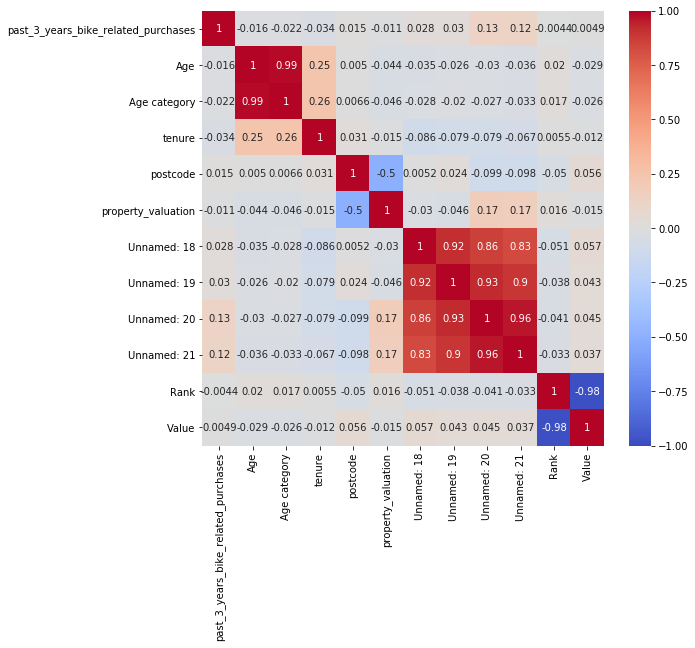

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(nc.corr(),vmin=-1,cmap='coolwarm',annot=True);

In [68]:
#frequency=nc['first_name'].value_counts().values

In [41]:
#f=pd.Series(frequency)
#f

In [42]:
#new_customer=nc.merge(f.rename('frequency'),left_index=True,right_index=True)

### Data Pre-processing

In [40]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   Age                                  1000 non-null   float64       
 6   Age category                         1000 non-null   int64         
 7   job_title                            894 non-null    object        
 8   job_industry_category                835 non-null    object        
 9   wealth_segment                       1000 non-null   object        
 10  deceased_indi

In [72]:
nc.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'Age category',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Rank', 'Value'],
      dtype='object')

In [49]:
df=nc.drop([ 'last_name','DOB', 'Age','job_title','address', 'postcode','country', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Rank'],axis=1)

In [50]:
df.head()

,first_name,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Value
0,Chickie,Male,86,70,Manufacturing,Mass Customer,N,Yes,14,QLD,6,1.718750
1,Morly,Male,69,60,Property,Mass Customer,N,No,16,NSW,11,1.718750
2,Ardelis,Female,10,50,Financial Services,Affluent Customer,N,No,10,VIC,5,1.718750
3,Lucine,Female,64,50,Manufacturing,Affluent Customer,N,Yes,5,QLD,1,1.703125
4,Melinda,Female,34,60,Financial Services,Affluent Customer,N,No,19,NSW,9,1.703125


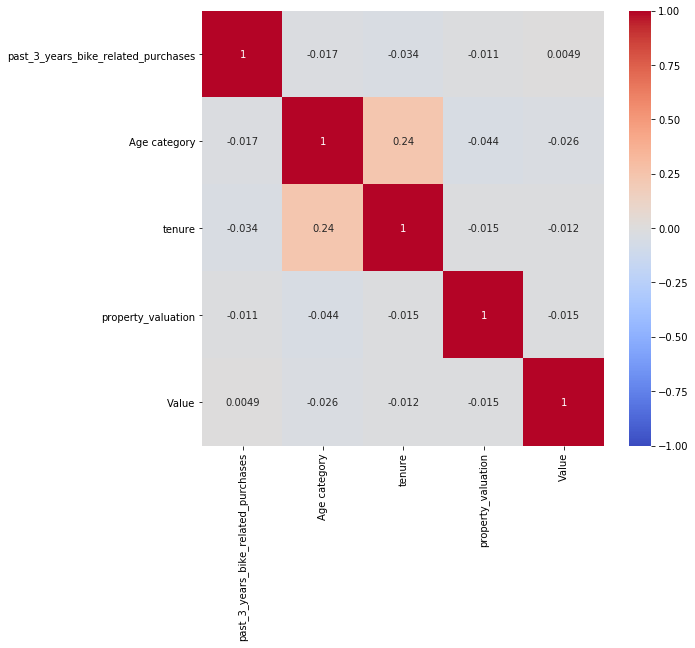

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True);

In [42]:
dt = pd.DataFrame(list(zip(df.columns,data.isna().sum()/20510*100, data.isna().sum())))
dt

,0,1,2
0,gender,0.0,0
1,past_3_years_bike_related_purchases,0.0,0
2,Age category,0.0,0
3,job_industry_category,0.0,0
4,wealth_segment,0.0,0
5,deceased_indicator,0.0,0
6,owns_car,0.0,0
7,tenure,0.0,0
8,state,0.0,0
9,property_valuation,0.0,0


In [51]:
df.replace(r'^\s*$', np.nan, regex=True)
df.isnull().sum()

first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
Age category                             0
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
state                                    0
property_valuation                       0
Value                                    0
dtype: int64

In [52]:
df.job_industry_category.fillna('unknown',inplace=True)
df.isnull().sum()

first_name                             0
gender                                 0
past_3_years_bike_related_purchases    0
Age category                           0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
state                                  0
property_valuation                     0
Value                                  0
dtype: int64

In [53]:
df2=df.copy()

### Dummy variables

In [54]:
mapping = {"N":0,"Y":1,"No":0,"Yes":1}
map2 = {'Mass Customer':0, 'Affluent Customer':1, 'High Net Worth':2}
df.deceased_indicator=df.deceased_indicator.map(mapping)
df.owns_car=df.owns_car.map(mapping)
df.wealth_segment= df.wealth_segment.map(map2)

In [55]:
df.head()

,first_name,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Value
0,Chickie,Male,86,70,Manufacturing,0,0,1,14,QLD,6,1.718750
1,Morly,Male,69,60,Property,0,0,0,16,NSW,11,1.718750
2,Ardelis,Female,10,50,Financial Services,1,0,0,10,VIC,5,1.718750
3,Lucine,Female,64,50,Manufacturing,1,0,1,5,QLD,1,1.703125
4,Melinda,Female,34,60,Financial Services,1,0,0,19,NSW,9,1.703125


In [56]:
df2.head()

,first_name,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Value
0,Chickie,Male,86,70,Manufacturing,Mass Customer,N,Yes,14,QLD,6,1.718750
1,Morly,Male,69,60,Property,Mass Customer,N,No,16,NSW,11,1.718750
2,Ardelis,Female,10,50,Financial Services,Affluent Customer,N,No,10,VIC,5,1.718750
3,Lucine,Female,64,50,Manufacturing,Affluent Customer,N,Yes,5,QLD,1,1.703125
4,Melinda,Female,34,60,Financial Services,Affluent Customer,N,No,19,NSW,9,1.703125


In [57]:
from sklearn import preprocessing
l1 = preprocessing.LabelEncoder()
df.gender=l1.fit_transform(df.gender)
df.head()

,first_name,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Value
0,Chickie,1,86,70,Manufacturing,0,0,1,14,QLD,6,1.718750
1,Morly,1,69,60,Property,0,0,0,16,NSW,11,1.718750
2,Ardelis,0,10,50,Financial Services,1,0,0,10,VIC,5,1.718750
3,Lucine,0,64,50,Manufacturing,1,0,1,5,QLD,1,1.703125
4,Melinda,0,34,60,Financial Services,1,0,0,19,NSW,9,1.703125


In [58]:
df = pd.get_dummies(df,columns=['job_industry_category','state'])
df.head()

,first_name,gender,past_3_years_bike_related_purchases,Age category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,Value,...,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_unknown,state_NSW,state_QLD,state_VIC
0,Chickie,1,86,70,0,0,1,14,6,1.718750,...,0,0,1,0,0,0,0,0,1,0
1,Morly,1,69,60,0,0,0,16,11,1.718750,...,0,0,0,1,0,0,0,1,0,0
2,Ardelis,0,10,50,1,0,0,10,5,1.718750,...,0,0,0,0,0,0,0,0,0,1
3,Lucine,0,64,50,1,0,1,5,1,1.703125,...,0,0,1,0,0,0,0,0,1,0
4,Melinda,0,34,60,1,0,0,19,9,1.703125,...,0,0,0,0,0,0,0,1,0,0


In [59]:
df=df.drop(['first_name','job_industry_category_Argiculture','state_QLD'],axis=1)
df.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'Age category',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure',
       'property_valuation', 'Value', 'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'job_industry_category_unknown', 'state_NSW', 'state_VIC'],
      dtype='object')

In [60]:
df.shape

(1000, 20)

### Model Building

In [61]:
X_test = df.drop(['Value'],axis=1)
X_test

,gender,past_3_years_bike_related_purchases,Age category,wealth_segment,deceased_indicator,owns_car,tenure,property_valuation,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_unknown,state_NSW,state_VIC
0,1,86,70,0,0,1,14,6,0,0,0,0,1,0,0,0,0,0,0
1,1,69,60,0,0,0,16,11,0,0,0,0,0,1,0,0,0,1,0
2,0,10,50,1,0,0,10,5,0,1,0,0,0,0,0,0,0,0,1
3,0,64,50,1,0,1,5,1,0,0,0,0,1,0,0,0,0,0,0
4,0,34,60,1,0,0,19,9,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,60,70,1,0,0,9,7,0,1,0,0,0,0,0,0,0,1,0
996,1,22,20,0,0,0,6,10,0,0,1,0,0,0,0,0,0,1,0
997,0,17,70,1,0,1,15,2,0,1,0,0,0,0,0,0,0,0,0
998,1,30,70,0,0,1,19,2,0,1,0,0,0,0,0,0,0,0,0


In [62]:
y_test=df['Value'].values
y_test

array([1.71875   , 1.71875   , 1.71875   , 1.703125  , 1.703125  ,
       1.671875  , 1.671875  , 1.65625   , 1.65625   , 1.640625  ,
       1.640625  , 1.625     , 1.609375  , 1.59375   , 1.59375   ,
       1.5625    , 1.546875  , 1.546875  , 1.53125   , 1.53125   ,
       1.515625  , 1.515625  , 1.5       , 1.5       , 1.484375  ,
       1.46875   , 1.46875   , 1.46875   , 1.46875   , 1.4609375 ,
       1.4609375 , 1.453125  , 1.453125  , 1.453125  , 1.453125  ,
       1.44765625, 1.44765625, 1.4375    , 1.4375    , 1.434375  ,
       1.434375  , 1.421875  , 1.421875  , 1.42109375, 1.42109375,
       1.4078125 , 1.4078125 , 1.4078125 , 1.4078125 , 1.40625   ,
       1.40625   , 1.39453125, 1.39453125, 1.38125   , 1.38125   ,
       1.38125   , 1.375     , 1.375     , 1.375     , 1.375     ,
       1.375     , 1.36796875, 1.36796875, 1.36796875, 1.3625    ,
       1.3625    , 1.3625    , 1.3546875 , 1.3546875 , 1.3546875 ,
       1.3546875 , 1.35      , 1.35      , 1.35      , 1.35   

In [63]:
from sklearn.preprocessing import StandardScaler
X_test = StandardScaler().fit_transform(X_test)
X_test[0:3]

array([[ 0.93075363,  1.30166939,  0.73551041, -0.89256027,  0.        ,
         1.01409939,  0.51880719, -0.50663215, -0.19601428, -0.50468321,
        -0.42337369, -0.23182058,  2.00627157, -0.26148818, -0.29085855,
        -0.16012815, -0.4445276 , -1.01207287, -0.60199487],
       [ 0.93075363,  0.68977968,  0.22685867, -0.89256027,  0.        ,
        -0.98609664,  0.91605618,  1.30665399, -0.19601428, -0.50468321,
        -0.42337369, -0.23182058, -0.49843701,  3.82426464, -0.29085855,
        -0.16012815, -0.4445276 ,  0.98807114, -0.60199487],
       [-0.94576579, -1.43383757, -0.28179306,  0.30873215,  0.        ,
        -0.98609664, -0.2756908 , -0.86928938, -0.19601428,  1.98144098,
        -0.42337369, -0.23182058, -0.49843701, -0.26148818, -0.29085855,
        -0.16012815, -0.4445276 , -1.01207287,  1.66114373]])

In [64]:
print("shape of X_test",X_test.shape)
print("shape of y_test",y_test.shape)

shape of X_test (1000, 19)
shape of y_test (1000,)


In [65]:
print("shape of X_test",X1.shape)
print("shape of y_test",y2.shape)

shape of X_test (19437, 19)
shape of y_test (19437,)


In [66]:
 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(max_depth=110,random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X1, y2) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=110,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [67]:
y_pred = regressor.predict(X_test)


In [68]:
y_pred

array([324., 143., 112., 111., 422., 424., 411., 422., 144., 211., 313.,
       444., 224., 422., 242., 144., 243., 211., 342., 113., 344., 323.,
       413., 344., 412., 444., 122., 311., 423., 344., 212., 112., 244.,
       444., 112., 112., 323., 211., 423., 312., 111., 431., 422., 324.,
       244., 323., 433., 444., 443., 243., 444., 443., 444., 444., 442.,
       144., 344., 444., 124., 111., 121., 234., 234., 234., 244., 111.,
       311., 211., 344., 411., 212., 123., 344., 444., 124., 423., 133.,
       221., 344., 323., 232., 112., 211., 422., 422., 344., 123., 444.,
       123., 322., 423., 433., 244., 444., 211., 443., 213., 111., 444.,
       123., 123., 312., 333., 311., 344., 124., 111., 421., 444., 431.,
       111., 424., 442., 244., 123., 222., 421., 222., 444., 233., 444.,
       222., 213., 332., 222., 331., 411., 243., 221., 424., 234., 423.,
       444., 311., 244., 242., 423., 123., 323., 222., 423., 212., 121.,
       112., 444., 411., 122., 344., 344., 134., 32

In [107]:
type(y_pred)

numpy.ndarray

In [69]:
y_pred=pd.Series(y_pred)
type(y_pred)

pandas.core.series.Series

### Final Data with Predicted values
#### here we can easily know that which customers are target customers with the help of RFM values .  Customers having predicted  values greater than 400 are Platinum Customers

In [70]:
new_customer_data=df2.merge(y_pred.rename('Predicted_value'),left_index=True,right_index=True)
new_customer_data.head()

,first_name,gender,past_3_years_bike_related_purchases,Age category,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Value,Predicted_value
0,Chickie,Male,86,70,Manufacturing,Mass Customer,N,Yes,14,QLD,6,1.718750,324.0
1,Morly,Male,69,60,Property,Mass Customer,N,No,16,NSW,11,1.718750,143.0
2,Ardelis,Female,10,50,Financial Services,Affluent Customer,N,No,10,VIC,5,1.718750,112.0
3,Lucine,Female,64,50,Manufacturing,Affluent Customer,N,Yes,5,QLD,1,1.703125,111.0
4,Melinda,Female,34,60,Financial Services,Affluent Customer,N,No,19,NSW,9,1.703125,422.0


In [71]:
new_customer_data.to_excel(r'C:\Users\kamakshi\Desktop\New folder\New Customer.xlsx',index=False)

In [117]:
d=np.where(new_data.Predicted_value>433)

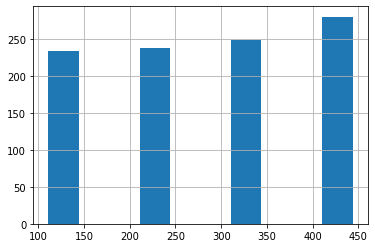

In [119]:
new_data.Predicted_value.hist()
plt.show()

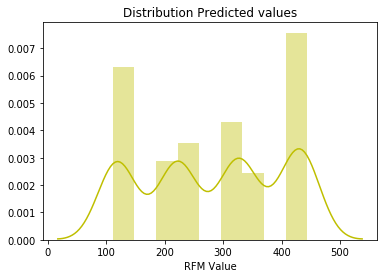

In [122]:
sns.distplot(new_data.Predicted_value.dropna(),color='y')
plt.title("Distribution Predicted values")
plt.xlabel("RFM Value")
plt.show()